In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import folium
import webbrowser
import pickle as pk
import json

In [2]:
with open('t.pkl',"rb") as f:
    t= pk.load(f)
f.close()
t.head()

,year,month,day,ctry_code,country,region,region,city,latitude,longitude,...,target,group,nperps,crit1,crit2,crit3,target_type,nationality,weapon,casualities
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Julio Guzman,MANO-D,NaN,1,1,1,Private Citizens & Property,Dominican Republic,Unknown,1.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,...,"Nadine Chaval, daughter",23rd of September Communist League,7.0,1,1,1,Government (Diplomatic),Belgium,Unknown,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,...,Employee,Unknown,NaN,1,1,1,Journalists & Media,United States,Unknown,1.0
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,...,U.S. Embassy,Unknown,NaN,1,1,1,Government (Diplomatic),United States,Explosives,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,...,U.S. Consulate,Unknown,NaN,1,1,1,Government (Diplomatic),United States,Incendiary,NaN


In [6]:
t.Weapon_type.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [3]:
colordict = {'Explosives':'red','Incendiary':'purple', 'Firearms':'blue',\
            'Chemical':'light blue','Sabotage Equipment':'yellow','Vehicle':'green',\
            'Fake Weapons':'orange', 'Radiological':'pink', 'Biological':'grey'}

In [6]:
df= pd.DataFrame(t)

df1 = df[['latitude','longitude','weapon','casualities','city']]


In [7]:
dfe=df1[  df1['weapon'] =='Explosives']
dfi=df1[  df1['weapon'] =='Incendiary']
dff=df1[  df1['weapon'] =='Firearms']
dfc=df1[  df1['weapon'] =='Chemical']
dfs=df1[  df1['weapon'] =='Sabotage Equipment']
dfv=df1[  df1['weapon'] =='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']
dfw=df1[  df1['weapon'] =='Fake Weapons']
dfr=df1[  df1['weapon'] =='Radiological']
dfb=df1[  df1['weapon'] =='Biological']


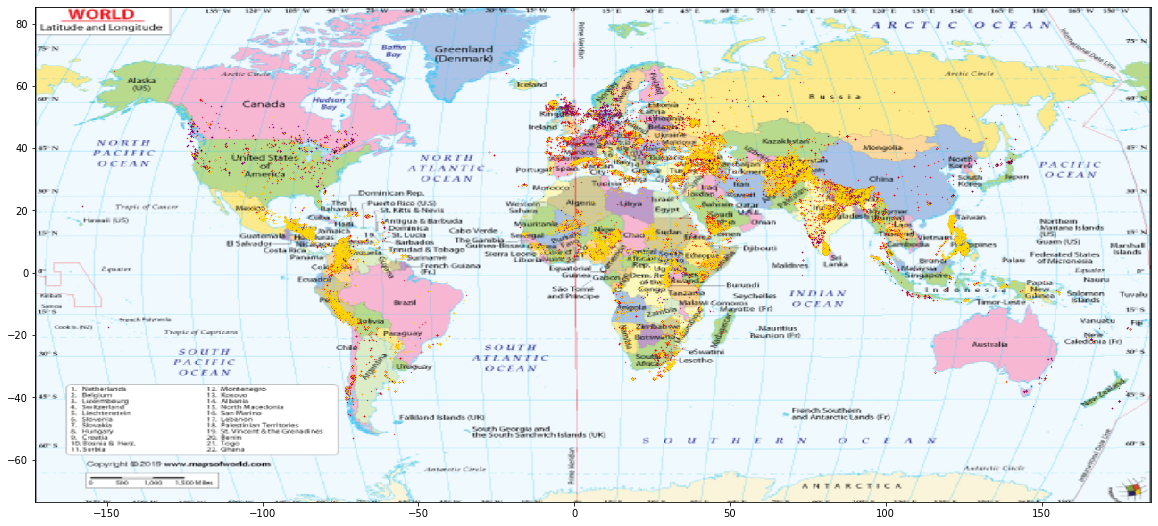

In [8]:
BBox=(-173,185.2,-73.5,85.3)

mp1= ptl.imread('map2.png')
fig, ax = ptl.subplots(figsize=(20,20))
ax.scatter(dfe.longitude, dfe.latitude, zorder = 1, c='r',s=0.1  )
ax.scatter(dfi.longitude, dfi.latitude, zorder = 1, c='purple',s=0.1   )
ax.scatter(dff.longitude, dff.latitude, zorder = 1, c='gold',s=0.1  )
ax.scatter(dfc.longitude, dfc.latitude, zorder = 1, c='indigo',s=0.1 )
ax.scatter(dfs.longitude, dfs.latitude, zorder = 1, c='olive',s=0.1 )

ax.scatter(dfb.longitude, dfb.latitude, zorder = 1, c='black',s=0.1 )






ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mp1,zorder =0, extent = BBox, aspect = 'equal')